In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
import matplotlib.pyplot as plt


import time

from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
#download the data
(trainX, trainy), (testX, testy) = cifar10.load_data()

#X_train and y_train will be used for training
X_train80, X_train, y_train80, y_train = train_test_split(trainX, trainy, test_size=0.2, random_state=42)

#For test and validation set
X_test, X_val, y_test, y_val = train_test_split(testX, testy, test_size=0.5, random_state=42)

In [3]:
#plot the accuracy and loss
def train_val_plt(history, key1 , key2, name) :
    plt.plot(history.history[key1])
    plt.plot(history.history[key2])
    plt.title(name)
    plt.xlabel('epochs')
    plt.ylabel('accuarcy')    
    X_range = np.arange(0, 5, 1)
    plt.xticks(X_range)
    plt.legend( ['train', 'validation'], loc = 'upper left')               
    plt.show()

def loss_plt(history, key1 , key2, name) : 
    plt.plot(history.history[key1])
    plt.plot(history.history[key2])
    plt.title(name)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    X_range = np.arange(0, 5, 1)
    plt.xticks(X_range)
    plt.legend( ['train', 'validation'], loc = 'upper left')           
    plt.show()

# Data Preprocessing

In [4]:
# Data Preprocessing for MLP
X_train_normalization = X_train.reshape( len(X_train), 32*32*3 ).astype('float32')
X_train_normalization /= 255
X_train_normalization.shape

X_val_normalization = X_val.reshape( len(X_val), 32*32*3 ).astype('float32')
X_val_normalization /= 255

X_test_normalization = X_test.reshape( len(X_test), 32*32*3 ).astype('float32')
X_test_normalization /= 255

#one hot encoding for label
y_train_onehot = np_utils.to_categorical(y_train)
y_val_onehot = np_utils.to_categorical(y_val)
y_test_onehot = np_utils.to_categorical(y_test)

#DATA PROCESSING FOR CNN
train_CNN, val_CNN, test_CNN = X_train / 255.0, X_val / 255.0, X_test / 255.0

# MLP

In [5]:
#MLP
MLP = Sequential()
MLP.add(Dense(input_dim = 32*32*3, units = 512, activation = 'sigmoid'))
MLP.add(Dense(units = 512, activation = 'sigmoid'))
#output layer
MLP.add(Dense(units = 10, activation = 'softmax'))

In [6]:
MLP.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [7]:
#compile the model
MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
#fit the model
history = MLP.fit(x = X_train_normalization, 
                  y = y_train_onehot, 
                  validation_data = (X_val_normalization, y_val_onehot), 
                  epochs=5, 
                  batch_size=32, 
                  verbose=2)  

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
 - 4s - loss: 2.0472 - accuracy: 0.2394 - val_loss: 1.9715 - val_accuracy: 0.2886
Epoch 2/5
 - 4s - loss: 1.8936 - accuracy: 0.3067 - val_loss: 1.8084 - val_accuracy: 0.3460
Epoch 3/5
 - 4s - loss: 1.8182 - accuracy: 0.3357 - val_loss: 1.8499 - val_accuracy: 0.3358
Epoch 4/5
 - 4s - loss: 1.7848 - accuracy: 0.3532 - val_loss: 1.8158 - val_accuracy: 0.3460
Epoch 5/5
 - 4s - loss: 1.7575 - accuracy: 0.3586 - val_loss: 1.8241 - val_accuracy: 0.3252


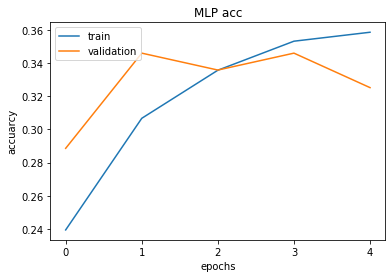

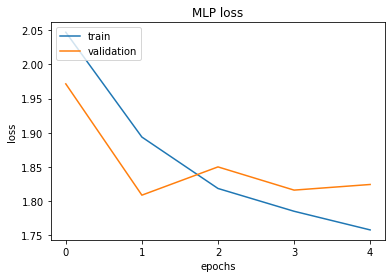

In [8]:
train_val_plt( history, 'accuracy', 'val_accuracy','MLP acc')
loss_plt( history, 'loss', 'val_loss','MLP loss')

In [9]:
# change MLP's the number of layer and the number of neurons as required in this problem


# #MLP
# MLP1 = Sequential()
# MLP1.add(Dense(input_dim = 32*32*3, units = 512, activation = 'sigmoid'))
# MLP1.add(Dense(units = 512, activation = 'sigmoid'))
# MLP1.add(Dense(units = 512, activation = 'sigmoid'))
# #output layer
# MLP1.add(Dense(units = 10, activation = 'softmax'))

# MLP1.summary()

# MLP1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# history1 = MLP1.fit(x = X_train_normalization, 
#                   y = y_train_onehot, 
#                   validation_data = (X_val_normalization, y_val_onehot), 
#                   epochs=5, 
#                   batch_size=32, 
#                   verbose=2)  

# train_val_plt( history1, 'accuracy', 'val_accuracy','MLP acc')

#==============================================
# #MLP
# MLP2 = Sequential()
# MLP2.add(Dense(input_dim = 32*32*3, units = 512, activation = 'sigmoid'))
# MLP2.add(Dense(units = 256, activation = 'sigmoid'))
# #output layer
# MLP2.add(Dense(units = 10, activation = 'softmax'))

# MLP2.summary()

# MLP2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# history2 = MLP2.fit(x = X_train_normalization, 
#                   y = y_train_onehot, 
#                   validation_data = (X_val_normalization, y_val_onehot), 
#                   epochs=5, 
#                   batch_size=32, 
#                   verbose=2)  

# train_val_plt( history2, 'accuracy', 'val_accuracy','MLP acc')

#==============================================
# #MLP
# MLP3 = Sequential()
# MLP3.add(Dense(input_dim = 32*32*3, units = 512, activation = 'sigmoid'))
# MLP3.add(Dense(units = 512, activation = 'sigmoid'))
# MLP3.add(Dense(units = 256, activation = 'sigmoid'))
# #output layer
# MLP3.add(Dense(units = 10, activation = 'softmax'))

# MLP3.summary()

# MLP3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# history3 = MLP3.fit(x = X_train_normalization, 
#                   y = y_train_onehot, 
#                   validation_data = (X_val_normalization, y_val_onehot), 
#                   epochs=5, 
#                   batch_size=32, 
#                   verbose=2)  

# train_val_plt( history3, 'accuracy', 'val_accuracy','MLP acc')

#==============================================
# #MLP
# MLP4 = Sequential()
# MLP4.add(Dense(input_dim = 32*32*3, units = 512, activation = 'sigmoid'))
# MLP4.add(Dense(units = 512, activation = 'sigmoid'))
# MLP4.add(Dense(units = 256, activation = 'sigmoid'))
# MLP4.add(Dense(units = 256, activation = 'sigmoid'))
# #output layer
# MLP4.add(Dense(units = 10, activation = 'softmax'))

# MLP4.summary()

# MLP4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# history4 = MLP4.fit(x = X_train_normalization, 
#                   y = y_train_onehot, 
#                   validation_data = (X_val_normalization, y_val_onehot), 
#                   epochs=5, 
#                   batch_size=32, 
#                   verbose=2)  

# train_val_plt( history4, 'accuracy', 'val_accuracy','MLP acc')

#==============================================
# #MLP
# MLP5 = Sequential()
# MLP5.add(Dense(input_dim = 32*32*3, units = 512, activation = 'sigmoid'))
# MLP5.add(Dense(units = 512, activation = 'sigmoid'))
# MLP5.add(Dense(units = 256, activation = 'sigmoid'))
# MLP5.add(Dense(units = 128, activation = 'sigmoid'))
# #output layer
# MLP5.add(Dense(units = 10, activation = 'softmax'))

# MLP5.summary()

# MLP5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# history5 = MLP5.fit(x = X_train_normalization, 
#                   y = y_train_onehot, 
#                   validation_data = (X_val_normalization, y_val_onehot), 
#                   epochs=5, 
#                   batch_size=32, 
#                   verbose=2)  

# train_val_plt( history5, 'accuracy', 'val_accuracy','MLP acc')

In [10]:
#evaluate the model
eval_MLP = MLP.evaluate(X_test_normalization, y_test_onehot)
print('Test_loss =', eval_MLP[0])
print('Test_accuracy =', eval_MLP[1])

5000/5000 [==============================] - 0s 72us/step
Test_loss = 1.8106987216949464
Test_accuracy = 0.33160001039505005


# CNN1

In [11]:
#CNN1
CNN1 = Sequential()
CNN1.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 3))) 
CNN1.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
CNN1.add(Flatten())
CNN1.add(Dense(512, activation='sigmoid')) 
CNN1.add(Dense(512, activation='sigmoid')) 
CNN1.add(Dense(10,activation = 'softmax'))

In [12]:
CNN1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               33554944  
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 33,861,450
Trainable params: 33,861,450
Non-trainable params: 0
__________________________________________

In [13]:
#compile the model
CNN1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
#fit the model
start_time = time.time()
history_CNN1 = CNN1.fit(x = train_CNN, 
                        y = y_train_onehot, 
                        validation_data = (val_CNN, y_val_onehot), 
                        epochs=5, 
                        batch_size=32)
end_time = time.time()
print('Training_time: ' + str(end_time - start_time))

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 133s 13ms/step - loss: 1.7819 - accuracy: 0.3394 - val_loss: 1.5281 - val_accuracy: 0.4378
Epoch 2/5
10000/10000 [==============================] - 134s 13ms/step - loss: 1.3078 - accuracy: 0.5307 - val_loss: 1.3764 - val_accuracy: 0.5002
Epoch 3/5
10000/10000 [==============================] - 133s 13ms/step - loss: 0.9365 - accuracy: 0.6706 - val_loss: 1.3363 - val_accuracy: 0.5370
Epoch 4/5
10000/10000 [==============================] - 133s 13ms/step - loss: 0.4979 - accuracy: 0.8374 - val_loss: 1.4758 - val_accuracy: 0.5396
Epoch 5/5
10000/10000 [==============================] - 133s 13ms/step - loss: 0.1712 - accuracy: 0.9568 - val_loss: 1.5496 - val_accuracy: 0.5608
Training_time: 665.8078038692474


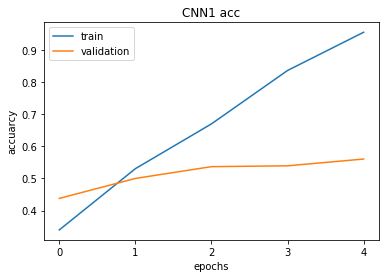

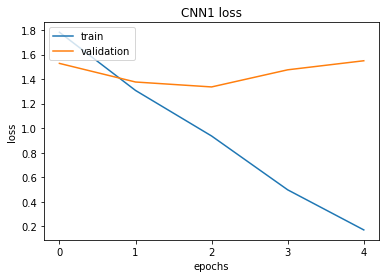

In [14]:
train_val_plt( history_CNN1, 'accuracy', 'val_accuracy','CNN1 acc')
loss_plt( history_CNN1, 'loss', 'val_loss','CNN1 loss')

In [15]:
#evaluate the model
eval_CNN1 = CNN1.evaluate(test_CNN, y_test_onehot)
print('Test_loss =', eval_CNN1[0])
print('Test_accuracy =', eval_CNN1[1])

5000/5000 [==============================] - 5s 917us/step
Test_loss = 1.5682392566680907
Test_accuracy = 0.5663999915122986


# CNN2

In [16]:
#CNN2
CNN2 = Sequential()
CNN2.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 3))) 
CNN2.add(MaxPooling2D((2, 2)))
CNN2.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 3)))
CNN2.add(MaxPooling2D((2, 2)))
CNN2.add(Flatten())
CNN2.add(Dense(512, activation='sigmoid')) 
CNN2.add(Dropout(0.2))
CNN2.add(Dense(512, activation='sigmoid')) 
CNN2.add(Dropout(0.2))
CNN2.add(Dense(10,activation = 'softmax'))

In [17]:
CNN2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

In [18]:
#compile the model
CNN2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
#fit the model
start_time = time.time()
history_CNN2 = CNN2.fit(x = train_CNN, 
                  y = y_train_onehot, 
                  validation_data = (val_CNN, y_val_onehot), 
                  epochs=5, 
                  batch_size=32) 
end_time = time.time()
print('Training_time: ' + str(end_time - start_time))

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 17s 2ms/step - loss: 2.0336 - accuracy: 0.2438 - val_loss: 1.7782 - val_accuracy: 0.3578
Epoch 2/5
10000/10000 [==============================] - 17s 2ms/step - loss: 1.5912 - accuracy: 0.4110 - val_loss: 1.4902 - val_accuracy: 0.4530
Epoch 3/5
10000/10000 [==============================] - 18s 2ms/step - loss: 1.4033 - accuracy: 0.4923 - val_loss: 1.3524 - val_accuracy: 0.5076
Epoch 4/5
10000/10000 [==============================] - 18s 2ms/step - loss: 1.2600 - accuracy: 0.5491 - val_loss: 1.2471 - val_accuracy: 0.5518
Epoch 5/5
10000/10000 [==============================] - 18s 2ms/step - loss: 1.1306 - accuracy: 0.6013 - val_loss: 1.2168 - val_accuracy: 0.5636
Training_time: 88.57905578613281


In [ ]:
train_val_plt(history_CNN2, 'accuracy', 'val_accuracy','CNN2 acc')
loss_plt( history_CNN2, 'loss', 'val_loss','CNN2 loss')

In [ ]:
#evaluate the model
eval_CNN2 = CNN2.evaluate(test_CNN, y_test_onehot)
print( 'Test_loss =', eval_CNN2[0] )
print( 'Test_accuracy =', eval_CNN2[1] )